# Observations

In this tutorial, we introduce $\mathrm{LiMe}$ observations. Before you can measure a line, you need to declare an observation which contains the astronomical body spectrum. $\mathrm{LiMe}$ provides three observation types:
* $\tt{lime.Spectrum}$: This class is suitable for long-slit spectrograph observations, both the spectrum dispersion axis (for example wavelength in angstroms) and the energy density axis (for example the flux in in MJy) have one dimension.
* $\tt{lime.Cube}$: This class is suitable for integral field spectrograph observations. In these datasets, the spectrum dispersion axis has only one dimension while the energy density has three dimensions.
* $\tt{lime.Sample}$: This class manages multiple observations which can be exported as multiple $\tt{lime.Spectrum}$ or $\tt{lime.Cube}$ objects. The class funcions do not load the data until a particular dataset is requested which make it suitable for platforms with low computational resources. 

For certain instruments, $\mathrm{LiMe}$ can create these observations directly from their *.fits* files. Additionally, you can also provide the observation data directly, [this guide](https://duckduckgo.com) focuses on some examples.

You can check the supported instruments with this command:

In [1]:
from pathlib import Path
import lime

lime.show_instrument_cfg()


Long-slit ".fits" observation instrument configuration:
0 nirspec) 	 units_wave: um, units_flux: MJy, pixel_mask: nan, res_power: None
1 isis) 	 units_wave: Angstrom, units_flux: FLAM, pixel_mask: nan, res_power: None
2 osiris) 	 units_wave: Angstrom, units_flux: FLAM, pixel_mask: nan, res_power: None
3 sdss) 	 units_wave: Angstrom, units_flux: 1e-17*FLAM, pixel_mask: nan, res_power: None
4 desi) 	 units_wave: Angstrom, units_flux: 1e-17*FLAM, pixel_mask: nan, res_power: None

Cube ".fits" observation instrument configuration:
0 manga) 	 units_wave: Angstrom, units_flux: 1e-17*FLAM,pixel_mask: nan, res_power: None
1 muse) 	 units_wave: Angstrom, units_flux: 1e-20*FLAM,pixel_mask: nan, res_power: None
2 megara) 	 units_wave: Angstrom, units_flux: Jy,pixel_mask: nan, res_power: None
3 miri) 	 units_wave: um, units_flux: MJy,pixel_mask: nan, res_power: None


<div class="alert alert-info">

**Please remember:** $LiMe$ assumes that your spectra from the instruments above uses the default calibration. You should always check that your observations and normalization and input the correct values at the observations declaration.

</div>

## Observations design

Let's start by reading a spectrum from the github  [examples/sample_data](https://github.com/Vital-Fernandez/lime/tree/master/examples/sample_data) folder:

In [2]:
# Specifying inputs:
data_folder = Path('../sample_data/spectra')
sloan_SHOC579 = data_folder/'sdss_dr18_0358-51818-0504.fits'
nirspec_ceers = data_folder/'hlsp_ceers_jwst_nirspec_nirspec10-001027_comb-mgrat_v0.7_x1d-masked.fits'

The first observation is a spectrum of the galaxy SHOC579 from the [SLOAN](https://www.sdss.org/) survey. We can load the data using the $\tt{lime.Spectrum.from\_file}$ command, which requires the name of the $\tt{instrument}$ and the $\tt{redshift}$ value for the observation.

In [3]:
shoc579 = lime.Spectrum.from_file(sloan_SHOC579, instrument='sdss', redshift=0.0475)

$\mathrm{LiMe}$ features a composite software design, utilizing instances of other classes to implement the target functionality. This approach is akin to that of [IRAF (see Tody 1986)](https://ui.adsabs.harvard.edu/abs/1986SPIE..627..733T/abstract):  Functions are organized into multi-level packages, which users access to perform the corresponding task. 

This design is illustrated on the figure below:

<img src="../images/LiMe_structure.png" alt="LiMe structure" title="LiMe structure"/>


The $\tt{Spectrum}$, $\tt{Cube}$ and $\tt{Sample}$ have access to the $\tt{.fit}$, $\tt{.plot}$ and $\tt{.check}$ attributes, which themselves organized $\mathrm{LiMe}$ data functions. For example we can plot SHOC579 spectrum with: 

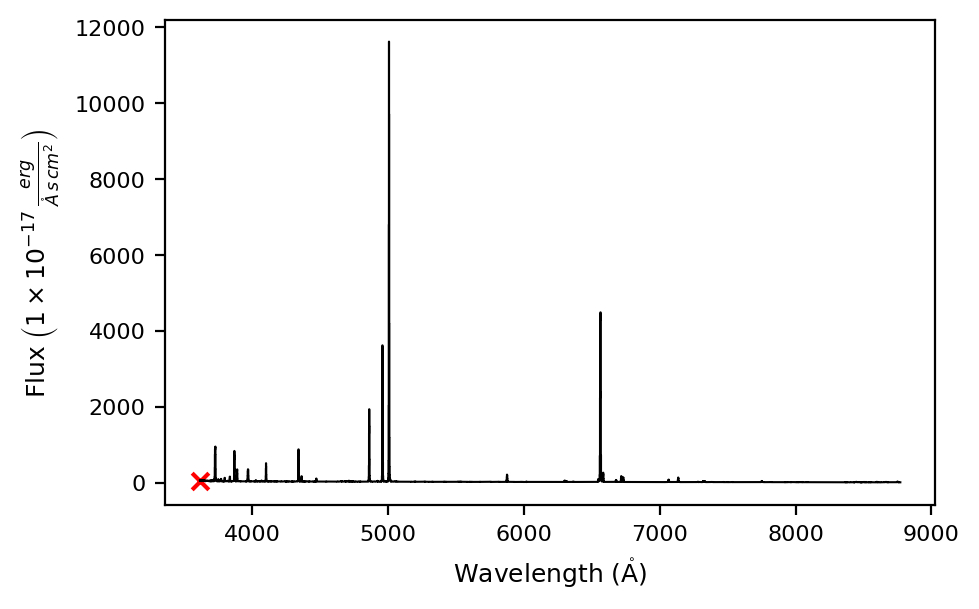

In [4]:
shoc579.plot.spectrum(rest_frame=True)

If we run the same commands with the z=7.82 CEERs1027 galaxy from the [CEERs](https://ceers.github.io/) survey we have:

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1e-08.


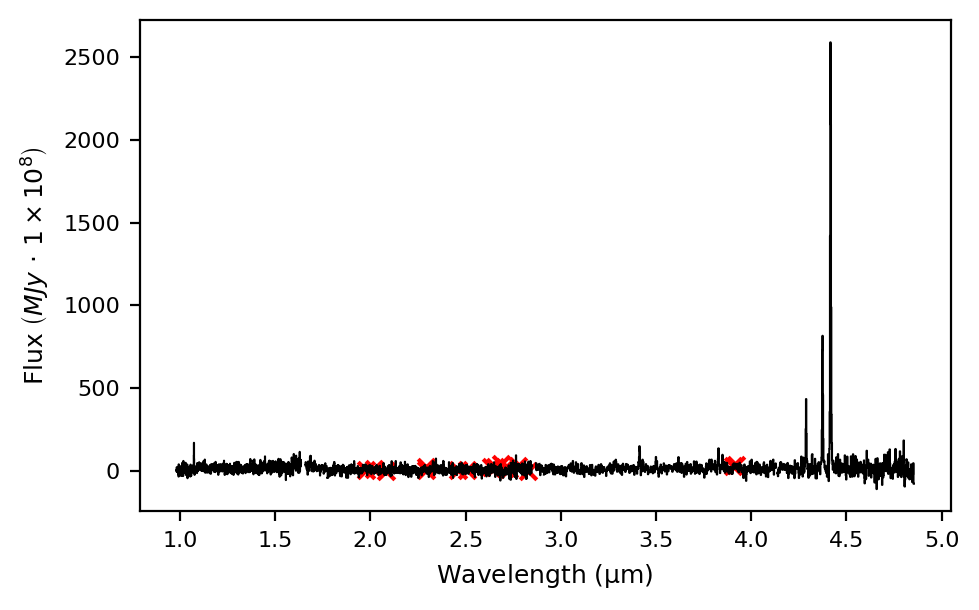

In [6]:
spec_ceers = lime.Spectrum.from_file(nirspec_ceers, instrument='nirspec', redshift=7.8189)
spec_ceers.plot.spectrum()

After running these commands, we may notice two differences with respect to the previous observation:
* $\mathrm{LiMe}$ has normalized the observation by 1e-08. In the case the observation units are very small (or very large) the fitting functions are likely to fail to converge. If the user does not provide a normalization, $\mathrm{LiMe}$ will check the checks units scale and apply one. This normalization is removed in the output measurements.
* In the CEERs1027 plot, some pixels have red crosses. This is because these pixels are masked: They will be displayed on the plots with redcrosses but not taken into consideration in the mathematical operations. If the user does not provide a pixel mask, $\mathrm{LiMe}$ will automatically mask $\tt{np.nan}$ and $\tt{np.inf}$ entries.

<div class="alert alert-info">

**Please remember:** $LiMe$ tries to diagnose the observation data prior to any measurement to avoid computational crashes. However, some non-numerical entries might still cause issues. It is very helpul that the users report their issues alongside an observation data example to reproduce the issue.

</div>

Beyond these three main modules, $\mathrm{LiMe}$ provides additional tools to interact with the observations. For example, we can use the $\tt{units\_conversion}$ function to change the observations units and/or normalization:

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1e-15.


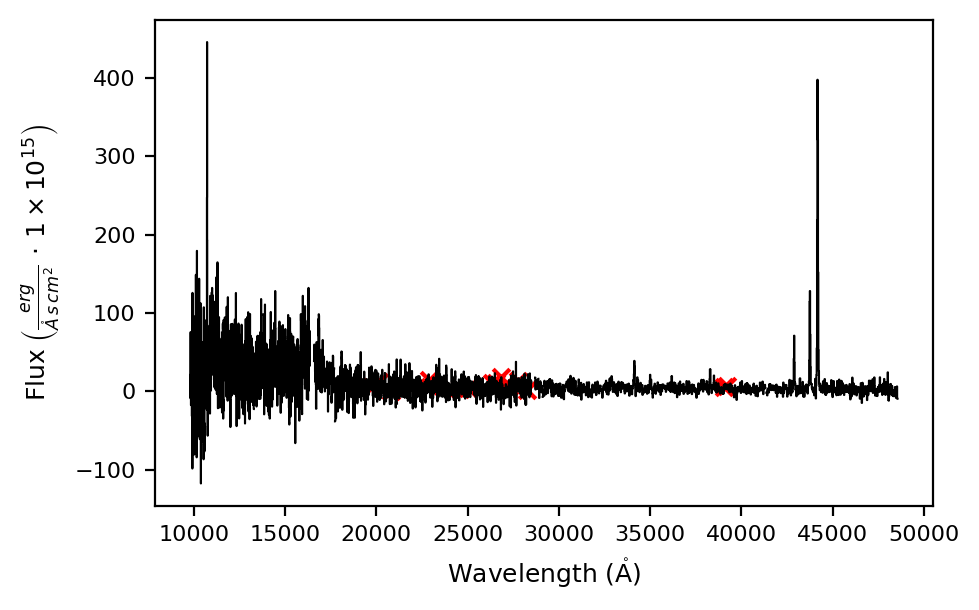

In [7]:
spec_ceers.unit_conversion(wave_units_out='Angstrom', flux_units_out='FLAM')
spec_ceers.plot.spectrum()

## Takeaways

* The $\mathrm{LiMe}$ $\tt{Spectrum}$, $\tt{Cube}$ and $\tt{Sample}$ observations match astronomical spectroscopic datasets.
* Some of these observations can be created directly via the $\tt{Spectrum.from\_file}$ and $\tt{Cube.from\_file}$ attributes for some observations types (check with $\tt{lime.show\_instrument\_cfg()}$). Additionally, you can provide the scientific data arrays directly as described in [this guide](https://duckduckgo.com).
* $\mathrm{LiMe}$ observations provide several functions to measure, plot and interact with the data. You can check the complete list and their attributes in the [API](https://duckduckgo.com).
* $\mathrm{LiMe}$ assumes the standard pipeline units for the supported instruments and automatically masks bad pixels on the observations. However, it is essential the user confirms the validity of the observational data. Please report any issues alongside an example to reproduce the issues.